Notebook for Tweet Cleaning and Initial Exploration

In [1]:
# Installing packages
#!pip install wordcloud
#!pip install plotly
#!pip install contractions

In [2]:
# Import packages
import re
import string
import collections
import contractions
import ipywidgets
import nltk.tokenize
import emoji

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter

In [3]:
pd.set_option('display.max_colwidth', None)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jacksonfuller/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Cleaning Dataset

In [4]:
# Import raw dataset
tweets_df = pd.read_csv('dummy data')
tweets_df.head()

,Unnamed: 0,tweet_id,text
0,0,1630989944289398784,"I ""think"" I started my menstrual cycle yesterday, but due to the ablation surgery working, I'm not bleeding at all!\n\nIt's really bizarre and cool! I have always been regular, so I can track that it's the right time. But the period part of it is just not there at all. (One still…"
1,1,1630974067875381265,cw menstruation ////\n.\n.\n.\ni have had my period for over 15 years. my cycle has always been over a month. when will my brain stop convincing myself that i’m pregnant every time i hit day 29 of my cycle.
2,2,1630965437709053952,"Clubs must ensure that they enhance supportive measures to our women on matters Menstrual Health Hygiene Management (MHM) including period tracking, free sanitary pads, MHM talks internally and with health experts, etc.\n\n#PlayersWelfareKE https://t.co/WyOkrwc8Wh"
3,3,1630878576538013696,"#EndPeriodShaming\nI used to think it was a normal narrative until I saw an orphan girl somewhere in the village who couldn't afford menstrual tools for her cycle and she was like ""I wish I was a boy, I wish I had parents""😭\nPads bring girls back to school. Pads end period poverty"
4,4,1630863346143580161,"Let’s push for ending period stigma, period poverty, provision of free and affordable sanitary pads, and open education on healthy, safe and dignified menstrual practices.\n#KeepGirlsInSchool #EducationForAll #EndPeriodPoverty \n#EndMenstrualStigma https://t.co/Ri7uMMjQwP"


In [5]:
def processed(text):    
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Expand contractions
    try:
        return contractions.fix(text)
    except:
        return text

In [6]:
tweets_df['processed_text'] = tweets_df['text'].apply(processed)
tweets_df.head()

,Unnamed: 0,tweet_id,text,processed_text
0,0,1630989944289398784,"I ""think"" I started my menstrual cycle yesterday, but due to the ablation surgery working, I'm not bleeding at all!\n\nIt's really bizarre and cool! I have always been regular, so I can track that it's the right time. But the period part of it is just not there at all. (One still…","i ""think"" i started my menstrual cycle yesterday, but due to the ablation surgery working, i am not bleeding at all! it is really bizarre and cool! i have always been regular, so i can track that it is the right time. but the period part of it is just not there at all. (one still…"
1,1,1630974067875381265,cw menstruation ////\n.\n.\n.\ni have had my period for over 15 years. my cycle has always been over a month. when will my brain stop convincing myself that i’m pregnant every time i hit day 29 of my cycle.,cw menstruation //// . . . i have had my period for over 15 years. my cycle has always been over a month. when will my brain stop convincing myself that i am pregnant every time i hit day 29 of my cycle.
2,2,1630965437709053952,"Clubs must ensure that they enhance supportive measures to our women on matters Menstrual Health Hygiene Management (MHM) including period tracking, free sanitary pads, MHM talks internally and with health experts, etc.\n\n#PlayersWelfareKE https://t.co/WyOkrwc8Wh","clubs must ensure that they enhance supportive measures to our women on matters menstrual health hygiene management (mhm) including period tracking, free sanitary pads, mhm talks internally and with health experts, etc."
3,3,1630878576538013696,"#EndPeriodShaming\nI used to think it was a normal narrative until I saw an orphan girl somewhere in the village who couldn't afford menstrual tools for her cycle and she was like ""I wish I was a boy, I wish I had parents""😭\nPads bring girls back to school. Pads end period poverty","i used to think it was a normal narrative until i saw an orphan girl somewhere in the village who could not afford menstrual tools for her cycle and she was like ""i wish i was a boy, i wish i had parents""😭 pads bring girls back to school. pads end period poverty"
4,4,1630863346143580161,"Let’s push for ending period stigma, period poverty, provision of free and affordable sanitary pads, and open education on healthy, safe and dignified menstrual practices.\n#KeepGirlsInSchool #EducationForAll #EndPeriodPoverty \n#EndMenstrualStigma https://t.co/Ri7uMMjQwP","let us push for ending period stigma, period poverty, provision of free and affordable sanitary pads, and open education on healthy, safe and dignified menstrual practices."


In [7]:
# Initialize Lemmatize
wordnet_lem = WordNetLemmatizer()
stopwords = set(STOPWORDS)

#  Strip punctuation, stopwords, numbers
def stripped(text):
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    # Drop punctuation
    text = re.sub('[' + punctuation + ']+', ' ', text)
    # Drop stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    # Drop numbers
    text = re.sub(r'\d+', '', text)
    # Drop extra blank spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

tweets_df['stripped_text'] = tweets_df['processed_text'].apply(stripped)

# Lemmatize stripped text
tweets_df['text_lem'] = tweets_df['stripped_text'].apply(wordnet_lem.lemmatize)

In [8]:
# Initialize Lemmatize
wordnet_lem = WordNetLemmatizer()
stopwords = set(STOPWORDS)

#  Strip punctuation, stopwords, numbers
def stripped(text):
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    # Drop punctuation
    text = re.sub('[' + punctuation + ']+', ' ', text)
    # Drop numbers
    text = re.sub(r'\d+', '', text)
    # Drop extra blank spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Drop words less than 3 characters and stopwords
    tokens = [word for word in text.split() if len(word) >= 3 and word not in stopwords]
    return " ".join(tokens)

tweets_df['stripped_text'] = tweets_df['processed_text'].apply(stripped)

# Lemmatize stripped text
tweets_df['text_lem'] = tweets_df['stripped_text'].apply(wordnet_lem.lemmatize)

In [9]:
tweets_df['text_tokens'] = tweets_df['text_lem'].apply(word_tokenize)
tweets_df.head()

,Unnamed: 0,tweet_id,text,processed_text,stripped_text,text_lem,text_tokens
0,0,1630989944289398784,"I ""think"" I started my menstrual cycle yesterday, but due to the ablation surgery working, I'm not bleeding at all!\n\nIt's really bizarre and cool! I have always been regular, so I can track that it's the right time. But the period part of it is just not there at all. (One still…","i ""think"" i started my menstrual cycle yesterday, but due to the ablation surgery working, i am not bleeding at all! it is really bizarre and cool! i have always been regular, so i can track that it is the right time. but the period part of it is just not there at all. (one still…",think started menstrual cycle yesterday due ablation surgery working bleeding really bizarre cool always regular track right time period part one still…,think started menstrual cycle yesterday due ablation surgery working bleeding really bizarre cool always regular track right time period part one still…,"[think, started, menstrual, cycle, yesterday, due, ablation, surgery, working, bleeding, really, bizarre, cool, always, regular, track, right, time, period, part, one, still…]"
1,1,1630974067875381265,cw menstruation ////\n.\n.\n.\ni have had my period for over 15 years. my cycle has always been over a month. when will my brain stop convincing myself that i’m pregnant every time i hit day 29 of my cycle.,cw menstruation //// . . . i have had my period for over 15 years. my cycle has always been over a month. when will my brain stop convincing myself that i am pregnant every time i hit day 29 of my cycle.,menstruation period years cycle always month will brain stop convincing pregnant every time hit day cycle,menstruation period years cycle always month will brain stop convincing pregnant every time hit day cycle,"[menstruation, period, years, cycle, always, month, will, brain, stop, convincing, pregnant, every, time, hit, day, cycle]"
2,2,1630965437709053952,"Clubs must ensure that they enhance supportive measures to our women on matters Menstrual Health Hygiene Management (MHM) including period tracking, free sanitary pads, MHM talks internally and with health experts, etc.\n\n#PlayersWelfareKE https://t.co/WyOkrwc8Wh","clubs must ensure that they enhance supportive measures to our women on matters menstrual health hygiene management (mhm) including period tracking, free sanitary pads, mhm talks internally and with health experts, etc.",clubs must ensure enhance supportive measures women matters menstrual health hygiene management mhm including period tracking free sanitary pads mhm talks internally health experts etc,clubs must ensure enhance supportive measures women matters menstrual health hygiene management mhm including period tracking free sanitary pads mhm talks internally health experts etc,"[clubs, must, ensure, enhance, supportive, measures, women, matters, menstrual, health, hygiene, management, mhm, including, period, tracking, free, sanitary, pads, mhm, talks, internally, health, experts, etc]"
3,3,1630878576538013696,"#EndPeriodShaming\nI used to think it was a normal narrative until I saw an orphan girl somewhere in the village who couldn't afford menstrual tools for her cycle and she was like ""I wish I was a boy, I wish I had parents""😭\nPads bring girls back to school. Pads end period poverty","i used to think it was a normal narrative until i saw an orphan girl somewhere in the village who could not afford menstrual tools for her cycle and she was like ""i wish i was a boy, i wish i had parents""😭 pads bring girls back to school. pads end period poverty",used think normal narrative saw orphan girl somewhere village afford menstrual tools cycle wish boy wish parents pads bring girls back school pads end period poverty,used think normal narrative saw orphan girl somewhere village afford menstrual tools cycle wish boy wish parents pads bring girls back school pads end period poverty,"[used, think, normal, narrative, saw, orphan, girl, somewhere, vil

Hashtags

In [10]:
# Create list of all hashtags in dataset
hashtags_list = []

for tweet in tweets_df['text']:
    # Extract hashtags from tweet content
    hashtags_temp = [hashtag.lower() for hashtag in re.findall(r'#\w+', tweet)]
    # Append hashtags to list
    hashtags_list.extend(hashtags_temp)

# Count frequency of each hashtag
hashtags_count = Counter(hashtags_list)

# Print the top 20 most common hashtags
top_n = 20
for hashtag, count in hashtags_count.most_common(top_n):
    print(f"{hashtag:<20} {count:<10}")

#endperiodshaming    13        
#periods             5         
#sanitarypads        5         
#menstruation        4         
#endperiodpoverty    3         
#letherknow          2         
#menstrualcycle      2         
#urchoice            2         
#anionnapkin         2         
#fastabsorbing       2         
#distributor         2         
#period              2         
#sleepbindazzz       2         
#sanitarynapkin      2         
#menstruationmatters 2         
#playerswelfareke    1         
#keepgirlsinschool   1         
#educationforall     1         
#endmenstrualstigma  1         
#womben              1         


Mentions

In [11]:
# Create list of all hashtags in dataset
mentions_list = []

for tweet in tweets_df['text']:
    # Extract hashtags from tweet content
    mentions_temp = [mention.lower() for mention in re.findall(r'@\w+', tweet)]
    # Append hashtags to list
    mentions_list.extend(mentions_temp)

# Count frequency of each hashtag
mentions_count = Counter(mentions_list)

# Print the top 20 most common hashtags
top_n = 20
for mentions, count in mentions_count.most_common(top_n):
    print(f"{mentions:<20} {count:<10}")

@gloria_orwoba       12        
@jillfilipovic       3         
@leopardonbackup     2         
@dearblueearth       1         
@seanbraisted        1         
@ghosty02772504      1         
@surende12737855     1         
@gonegirlisback      1         
@tinni_aphrodite     1         
@ishcomic            1         
@mahuadey20          1         
@ranjona             1         
@_sarvesh_jha_       1         
@ias_keeda           1         
@elle_kaye11         1         
@la_sassypants       1         
@dc_draino           1         
@rubinsafaya         1         
@sunshineisbrief     1         
@arjunkganguly2      1         


Unigrams (incl. worldcloud w/wo keywords)

In [12]:
# Creating basic wordcloud without a shape mask
#stopwords = set(STOPWORDS)

#wordcloud_twitter = WordCloud(background_color = 'white', 
#                              mode="RGBA", 
#                              stopwords=stopwords).generate(all_words_lem)
# Display the generated Word Cloud
#plt.imshow(wordcloud_twitter, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [13]:
# Making brand logo maskable if not already
#mask = np.array(Image.open("lymlogo.png"))

#def transform_zeros(val):
#    if val == 0:
#        return 255
#    else:
#        return val
    
#maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

#for i in range(len(mask)):
#    maskable_image[i] = list(map(transform_zeros, mask[i]))
    
#mask = maskable_image

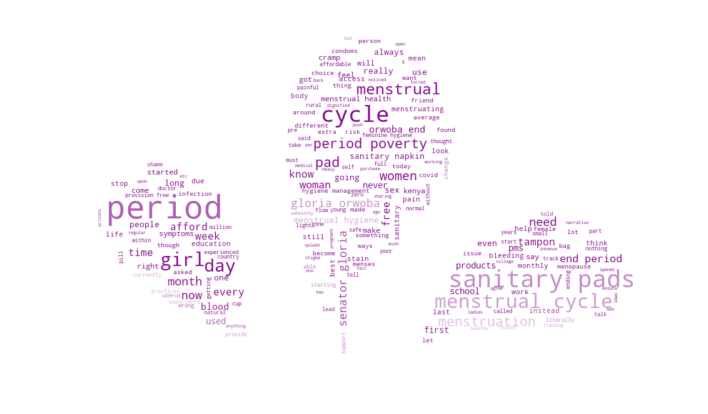

In [14]:
# Generate a word cloud image with mask

# Join all lemmatized words in a list
all_words_lem = ' '.join([word for word in tweets_df['text_lem']])

mask = np.array(Image.open("lymlogo2.png"))

stopwords = set(STOPWORDS)

wordcloud_twitter1 = WordCloud(height=400,
                              width=800,
                              background_color="white", 
                              mode="RGBA",
                              stopwords=stopwords,
                              mask=mask).generate(all_words_lem)

# Display the generated Word Cloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_twitter1.recolor(color_func=image_colors), interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [15]:
# Generate a word cloud image with mask excluding keywords

# List of keywords to remove
# *Need to edit this code, the drop function doesn't work all the way throughout
#keywords_drop = ['period','cycle','sanitary', 'pads', 'cramps', 'cycle', 'bleed', 'bleeding','poverty', 'menstruate','menstruation','menstrual','menses', 'menstruates', 'menstruated', 'menstruating', 'menstruous','premenstrual','postmenstrual', 'menopause','PMS', 'PMDD', 'endometriosis', 'fibroids', 'tampon', 'tampons']

# Remove all the words in the list of keywords
#processed_words_lem = ""
#for word in all_words_lem.split():
#    if word not in keywords_drop:
#        processed_words_lem += word + " "

#processed_words_lem = processed_words_lem.strip()

#wordcloud_twitter2 = WordCloud(height=400,
#                              width=800,
#                              background_color="white", 
#                              mode="RGBA",
#                              stopwords=stopwords,
#                              mask=mask).generate(processed_words_lem)

# Display the generated Word Cloud
#image_colors = ImageColorGenerator(mask)
#plt.figure(figsize=[10,10])
#plt.imshow(wordcloud_twitter1.recolor(color_func=image_colors), interpolation='bilinear')
#plt.tight_layout(pad=0)
#plt.axis("off")
#plt.show()

Bi-grams

In [16]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams_list = get_top_n_bigram(tweets_df['processed_text'], 20)
bigrams_list = bigrams_list[1:]

for word, freq in bigrams_list:
    print(word, freq)

menstrual cycle 35
period poverty 18
senator gloria 12
gloria orwoba 12
end period 11
orwoba end 9
menstrual hygiene 7
menstrual health 6
women girls 6
sanitary napkin 5
afford sanitary 5
period just 4
hygiene management 4
menstrual products 4
free sanitary 3
cycle like 3
provision free 3
feminine hygiene 3
menstruation cycle 3


In [17]:
# Top bigrams excluding keywords
# bigrams_list2 = get_top_n_bigram(tweets_df['processed_text'], 50)
# bigrams_list2 = bigrams_list2[1:]

# to_drop = ['period cycle','sanitary pads', 'my period', 'your period', 'period cramps', 'period cycle', 'period bleed', 'period bleeding','period poverty''menstruate','menstruation','menstrual','menses', 'menstruates', 'menstruated', 'menstruating', 'menstruous','premenstrual','postmenstrual', 'menopause','PMS', 'PMDD', 'endometriosis', 'fibroids', 'tampon', 'tampons']


#for word, freq in bigrams_list2:
#    print(word, freq)

Tri-grams

In [18]:
# Top trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

trigrams_list = get_top_n_trigram(tweets_df['processed_text'], 20)

for word, freq in trigrams_list:
    print(word, freq)

senator gloria orwoba 12
end period poverty 11
gloria orwoba end 9
orwoba end period 9
afford sanitary pads 5
free sanitary pads 3
menstrual hygiene management 3
menstrual cycle period 3
woman menstrual cycle 3
women girls kenya 3
let push ending 2
push ending period 2
ending period stigma 2
period stigma period 2
stigma period poverty 2
period poverty provision 2
poverty provision free 2
provision free affordable 2
free affordable sanitary 2
affordable sanitary pads 2


In [19]:
# Export pre-processed data for analysis
tweets_df.to_csv("dummy data_processed")